In [1]:
# Dataset
!curl -O https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1598  100  1598    0     0   5513      0 --:--:-- --:--:-- --:--:--  5529


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df = pd.read_csv('./perrin-freres-monthly-champagne.csv',
                 index_col='Month',
                 skipfooter=2,
                 parse_dates=True)
df.head()

C:\Users\zheng\AppData\Local\Temp\ipykernel_23612\639485286.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./perrin-freres-monthly-champagne.csv',


,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


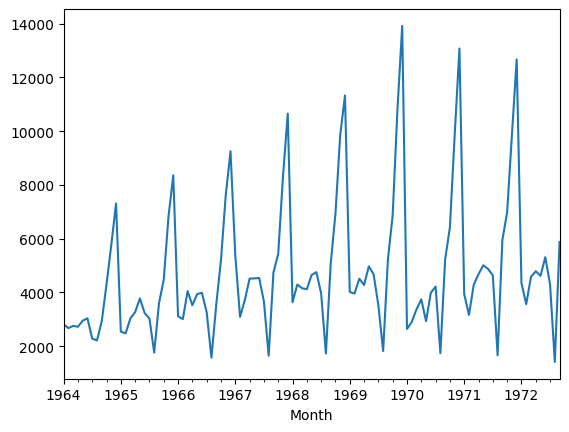

In [4]:
df.index.freq = 'MS'
df.columns = ['Sales']
df['Sales'].plot();

In [23]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
train_idx = df.index < train.index[-1]
test_idx = df.index >= test.index[0]

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(
    train['Sales'],
    trend='add',
    initialization_method='legacy-heuristic',
    seasonal='mul',
    seasonal_periods=12
)
res_hw = hw.fit()

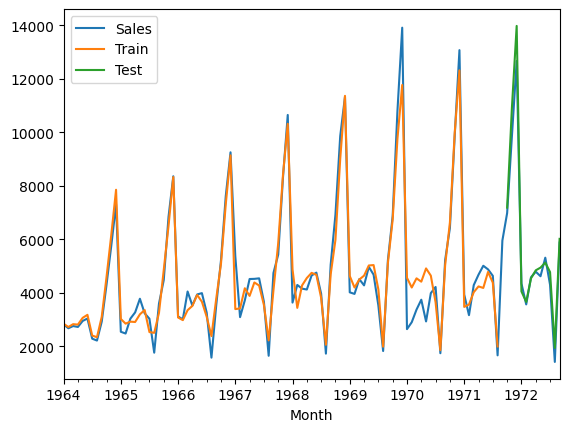

In [25]:
df.loc[train_idx, 'Train'] = res_hw.fittedvalues
df.loc[test_idx, 'Test'] = res_hw.forecast(Ntest)
df[['Sales', 'Train', 'Test']].plot();

In [26]:
r2_score(train['Sales'], res_hw.fittedvalues)

0.9379539220054911

In [27]:
r2_score(test['Sales'], res_hw.forecast(Ntest))

0.962607389903651